Here are three different PyTorch-based code examples for **Predictive Analytics for Demand Forecasting**. The first uses a simple Linear Regression model, the second uses a Long Short-Term Memory (LSTM) network, and the third applies a Transformer model. All examples use simulated data for simplicity but can be adapted to real-world datasets.

---

### **1. Linear Regression for Demand Forecasting**

```python
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split

# Simulated data (e.g., monthly demand and time in months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5  # Simulated demand with some noise

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(time, demand, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred = model(X_test)
print("Predicted Demand:", y_pred.detach().numpy())
```

This simple **Linear Regression** model predicts demand based on time. It’s suitable for linear trends.

---

### **2. LSTM for Time Series Demand Forecasting**

```python
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated time series data (e.g., demand over 100 months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5

# Scaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
demand = scaler.fit_transform(demand.reshape(-1, 1))

# Prepare input sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 5
data = create_sequences(demand, seq_length)
X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

# Instantiate model, loss function, and optimizer
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, X_train.size(0), model.hidden_layer_size),
                         torch.zeros(1, X_train.size(0), model.hidden_layer_size))
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred = model(X_test)
print("Predicted Demand:", scaler.inverse_transform(y_pred.detach().numpy()))
```

This **LSTM** model is suited for more complex, sequential data where historical demand affects future values.

---

### **3. Transformer for Time Series Demand Forecasting**

```python
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated time series data (e.g., demand over 100 months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5

# Scaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
demand = scaler.fit_transform(demand.reshape(-1, 1))

# Prepare input sequences for Transformer
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
data = create_sequences(demand, seq_length)
X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, num_heads=2, hidden_size=64, num_layers=2):
        super(TransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(input_size, 1)

    def forward(self, src):
        transformer_out = self.transformer(src)
        predictions = self.fc(transformer_out[:, -1])
        return predictions

# Instantiate model, loss function, and optimizer
model = TransformerModel(input_size=seq_length)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train.unsqueeze(0))
    loss = criterion(y_pred.squeeze(0), y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred = model(X_test.unsqueeze(0))
print("Predicted Demand:", scaler.inverse_transform(y_pred.squeeze(0).detach().numpy()))
```

This **Transformer** model is great for capturing long-term dependencies and trends in time series data, making it suitable for demand forecasting with more complex temporal structures.

---

These three models can be extended to work on real-world demand forecasting datasets like those from retail, logistics, or sales forecasting. You can customize the models depending on the complexity of the data and the desired outcomes.

In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulated data (e.g., monthly demand and time in months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5  # Simulated demand with noise

# Reshape data and apply normalization
scaler = StandardScaler()
time_scaled = scaler.fit_transform(time.reshape(-1, 1))
demand_scaled = scaler.fit_transform(demand.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(time_scaled, demand_scaled, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Reduced learning rate

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred = model(X_test)
print("Predicted Demand (Scaled):", y_pred.detach().numpy())

# Inverse transform to get the original scale
y_pred_original = scaler.inverse_transform(y_pred.detach().numpy())
print("Predicted Demand (Original Scale):", y_pred_original)


Epoch 100, Loss: 0.31702321767807007
Epoch 200, Loss: 0.27583155035972595
Epoch 300, Loss: 0.2427257001399994
Epoch 400, Loss: 0.21603265404701233
Epoch 500, Loss: 0.19445757567882538
Epoch 600, Loss: 0.17698678374290466
Epoch 700, Loss: 0.16281969845294952
Epoch 800, Loss: 0.151319682598114
Epoch 900, Loss: 0.1419772207736969
Epoch 1000, Loss: 0.13438306748867035
Predicted Demand (Scaled): [[0.42918652]
 [0.4505269 ]
 [0.47186714]
 [0.4932075 ]
 [0.5145478 ]
 [0.53588814]
 [0.5572285 ]
 [0.5785688 ]
 [0.5999092 ]
 [0.62124944]
 [0.6425898 ]
 [0.6639301 ]
 [0.6852705 ]
 [0.7066108 ]
 [0.72795105]
 [0.7492914 ]
 [0.77063173]
 [0.7919721 ]
 [0.81331235]
 [0.8346527 ]]
Predicted Demand (Original Scale): [[81.93218 ]
 [82.249565]
 [82.566956]
 [82.88434 ]
 [83.20173 ]
 [83.51912 ]
 [83.8365  ]
 [84.15389 ]
 [84.471275]
 [84.788666]
 [85.10605 ]
 [85.42344 ]
 [85.74083 ]
 [86.05821 ]
 [86.3756  ]
 [86.692986]
 [87.010376]
 [87.32777 ]
 [87.64515 ]
 [87.96254 ]]


Epoch 100, Loss: 0.4256606996059418
Epoch 200, Loss: 0.3072771430015564
Epoch 300, Loss: 0.23372431099414825
Epoch 400, Loss: 0.18769732117652893
Epoch 500, Loss: 0.15863463282585144
Epoch 600, Loss: 0.14007799327373505
Epoch 700, Loss: 0.12806835770606995
Epoch 800, Loss: 0.12017124891281128
Epoch 900, Loss: 0.11488310992717743
Epoch 1000, Loss: 0.11127050220966339
Train MSE: 24.605945587158203, Train RMSE: 4.960438251495361
Test MSE: 102.70573425292969, Test RMSE: 10.134384155273438


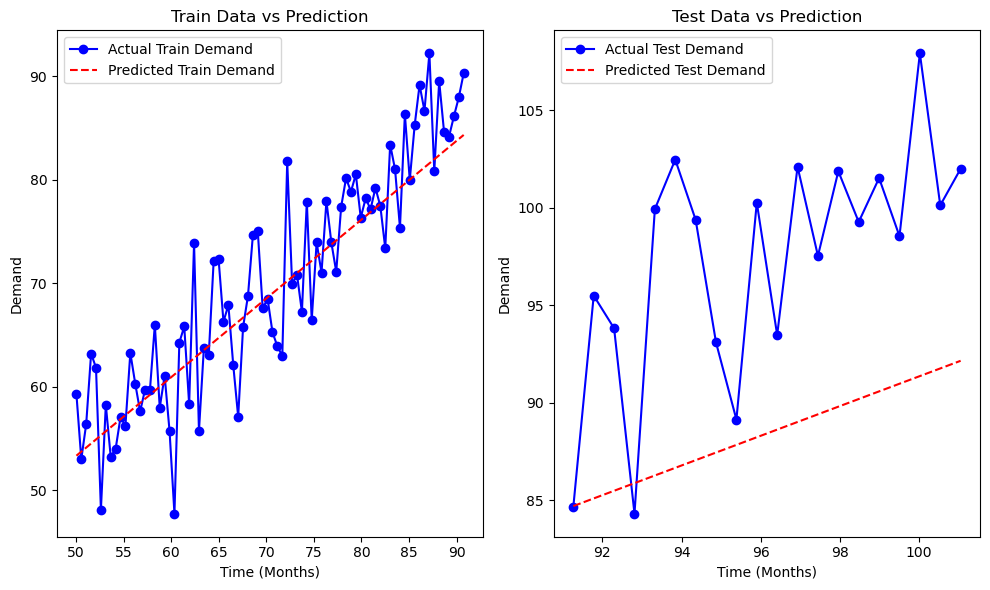

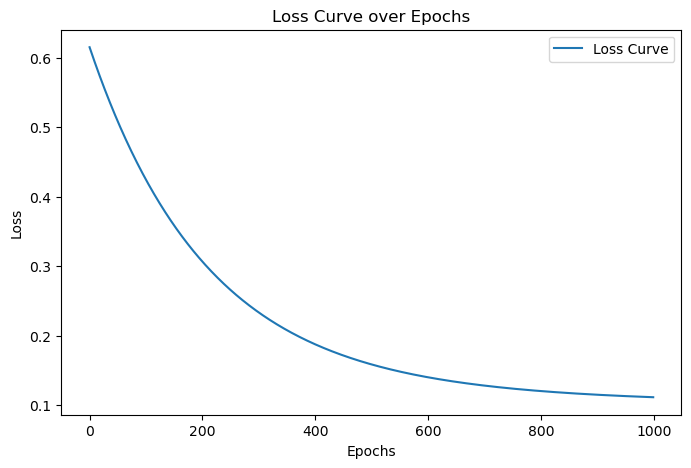

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Simulated data (e.g., monthly demand and time in months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5  # Simulated demand with noise

# Reshape data and apply normalization
scaler = StandardScaler()
time_scaled = scaler.fit_transform(time.reshape(-1, 1))
demand_scaled = scaler.fit_transform(demand.reshape(-1, 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(time_scaled, demand_scaled, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
loss_values = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # Store loss values for plotting
    loss_values.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred_train = model(X_train)
y_pred_test = model(X_test)

# Inverse transform predictions to original scale
y_pred_train_original = scaler.inverse_transform(y_pred_train.detach().numpy())
y_pred_test_original = scaler.inverse_transform(y_pred_test.detach().numpy())
y_train_original = scaler.inverse_transform(y_train.detach().numpy())
y_test_original = scaler.inverse_transform(y_test.detach().numpy())

# Quantitative evaluation (MSE and RMSE)
mse_train = mean_squared_error(y_train_original, y_pred_train_original)
mse_test = mean_squared_error(y_test_original, y_pred_test_original)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}")
print(f"Test MSE: {mse_test}, Test RMSE: {rmse_test}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training data and predictions
plt.subplot(1, 2, 1)
plt.plot(scaler.inverse_transform(X_train), y_train_original, 'bo-', label='Actual Train Demand')
plt.plot(scaler.inverse_transform(X_train), y_pred_train_original, 'r--', label='Predicted Train Demand')
plt.title('Train Data vs Prediction')
plt.xlabel('Time (Months)')
plt.ylabel('Demand')
plt.legend()

# Plot test data and predictions
plt.subplot(1, 2, 2)
plt.plot(scaler.inverse_transform(X_test), y_test_original, 'bo-', label='Actual Test Demand')
plt.plot(scaler.inverse_transform(X_test), y_pred_test_original, 'r--', label='Predicted Test Demand')
plt.title('Test Data vs Prediction')
plt.xlabel('Time (Months)')
plt.ylabel('Demand')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(loss_values, label='Loss Curve')
plt.title('Loss Curve over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated time series data (e.g., demand over 100 months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5

# Scaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
demand = scaler.fit_transform(demand.reshape(-1, 1))

# Prepare input sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 5
data = create_sequences(demand, seq_length)
X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

# Instantiate model, loss function, and optimizer
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1, X_train.size(0), model.hidden_layer_size),
                         torch.zeros(1, X_train.size(0), model.hidden_layer_size))
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred = model(X_test)
print("Predicted Demand:", scaler.inverse_transform(y_pred.detach().numpy()))


Epoch 50, Loss: 0.047317273914813995
Epoch 100, Loss: 0.034840330481529236
Epoch 150, Loss: 0.03400622680783272
Epoch 200, Loss: 0.03353353217244148
Epoch 250, Loss: 0.03316633775830269
Epoch 300, Loss: 0.03295234218239784


RuntimeError: Expected hidden[0] size (1, 19, 50), got [1, 76, 50]

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated time series data (e.g., demand over 100 months)
np.random.seed(0)
time = np.arange(1, 101)  # 100 months
demand = 50 + 0.5 * time + np.random.randn(100) * 5

# Scaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
demand = scaler.fit_transform(demand.reshape(-1, 1))

# Prepare input sequences for Transformer
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
data = create_sequences(demand, seq_length)
X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, num_heads=2, hidden_size=64, num_layers=2):
        super(TransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(input_size, 1)

    def forward(self, src):
        transformer_out = self.transformer(src)
        predictions = self.fc(transformer_out[:, -1])
        return predictions

# Instantiate model, loss function, and optimizer
model = TransformerModel(input_size=seq_length)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train.unsqueeze(0))
    loss = criterion(y_pred.squeeze(0), y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation
model.eval()
y_pred = model(X_test.unsqueeze(0))
print("Predicted Demand:", scaler.inverse_transform(y_pred.squeeze(0).detach().numpy()))


/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


AssertionError: query should be unbatched 2D or batched 3D tensor but received 4-D query tensor